In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



# Load the dataset
hotel_booking_df = pd.read_csv('D:\PYTHON_TEST\hotel_booking.csv')
hotel_booking_df




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [2]:
# To get the column names as an Index object
column_names = hotel_booking_df.columns

# To print the column names directly
print(column_names)

# To get the column names as a list
column_names_list = list(column_names)

# To print the column names as a list
print(column_names_list)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal'

1. Inspecting the Dataset

In [3]:
# Displaying basic information about the dataset
print(hotel_booking_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Handling misssing Values

print(hotel_booking_df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# Dropping the 'agent' and 'company' columns
hotel_booking_df.drop(['agent', 'company'], axis=1, inplace=True)

# Replacing missing values in the 'country' column with 'Unknown'
hotel_booking_df['country'].fillna('Unknown', inplace=True)

# Handling missing values
hotel_booking_df['children'].fillna(hotel_booking_df['children'].mode()[0], inplace=True)

In [6]:
# Display the count of null values in each column after modifications
print(hotel_booking_df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

--------------------------------------------
1. Customer Demographics and Preferences:
--------------------------------------------

Where do most guests come from? Analyzing the country column can help understand the geographical distribution of guests.
What are the most common customer types? Looking at the customer_type column can reveal whether most guests are individuals, families, groups, etc.
What are the preferences in terms of room types and special requests? This information can help us tailor services to the most common guest profiles.

In [7]:
# 1. Geographical Distribution of Guests:

top_countries = hotel_booking_df['country'].value_counts().head(10)
print(top_countries)


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


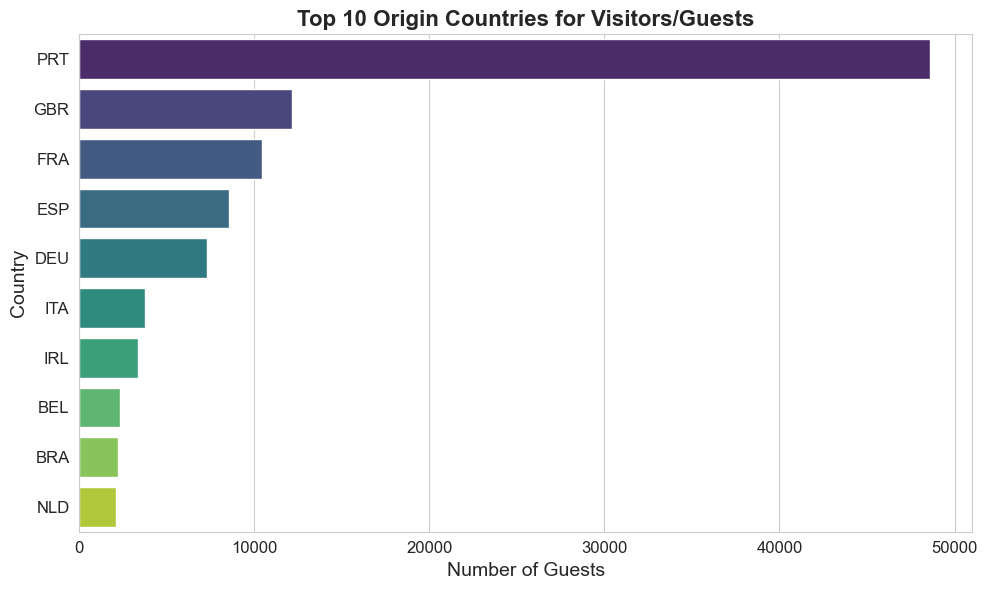

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Countries Visualization
sns.set_style("whitegrid")  # Set seaborn style
plt.figure(figsize=(10, 6))  # Set figure size
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis", orient='h')  # Change orientation to horizontal
ax.set_title('Top 10 Origin Countries for Visitors/Guests', fontsize=16, fontweight='bold')  # Title with increased font size and bold
ax.set_xlabel('Number of Guests', fontsize=14)  # X-axis label with increased font size
ax.set_ylabel('Country', fontsize=14)  # Y-axis label with increased font size
plt.xticks(fontsize=12)  # Increase font size of x-tick labels
plt.yticks(fontsize=12)  # Increase font size of y-tick labels
plt.tight_layout()  # Adjust layout
plt.show()


The first visualization provides a clear indication of the international diversity of the hotel's clientele. The bar chart titled "Top 10 Countries of Origin for Guests" shows that the majority of the guests originate from Portugal, followed by Great Britain, and France.This data suggests that targeted marketing strategies in these regions could be highly effective.



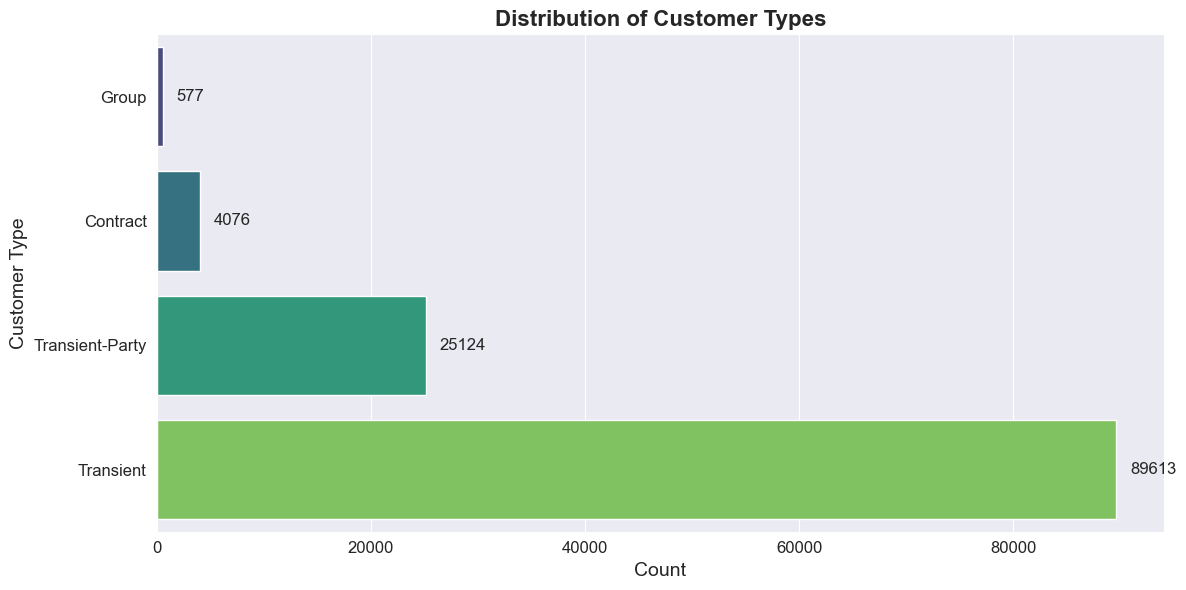

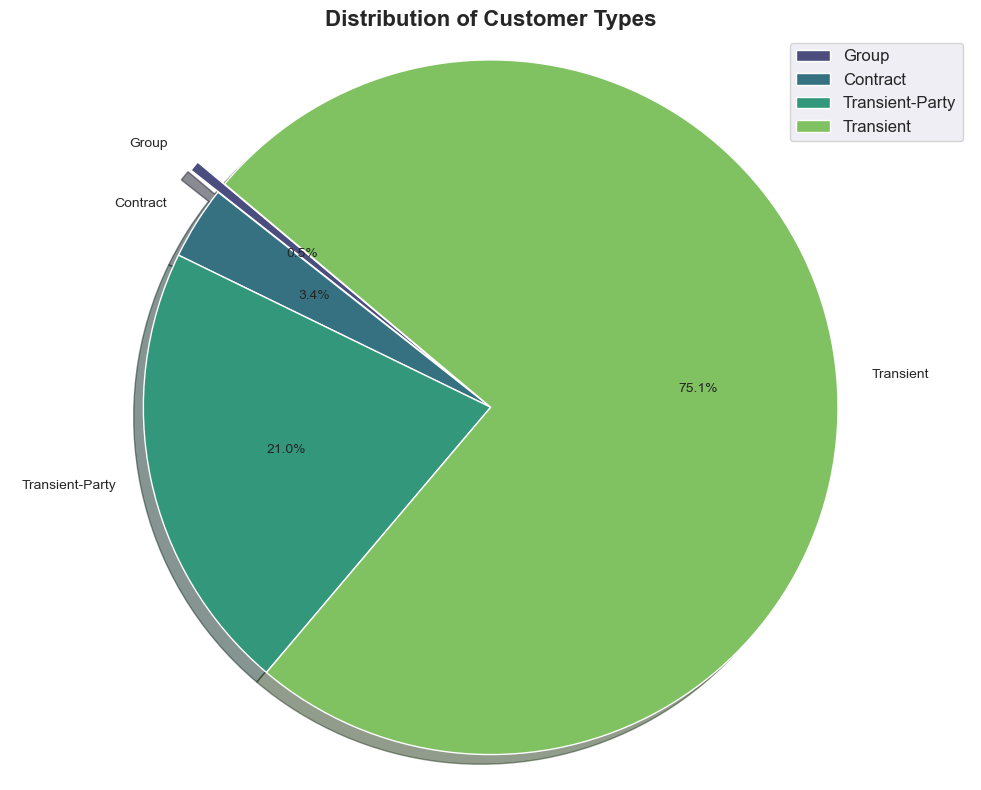

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("darkgrid")

# Common Customer Type Bar Plot
plt.figure(figsize=(12, 6))
customer_types = hotel_booking_df['customer_type'].value_counts()
customer_types = customer_types[::-1]  # Reverse order
ax = sns.barplot(x=customer_types.values, y=customer_types.index, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                xytext=(10, 0), 
                textcoords='offset points', fontsize=12)

# Customize fonts and labels
plt.title('Distribution of Customer Types', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

# Pie Chart to visualize customer distribution
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0)
colors = ['#4b4d7f', '#367182', '#33977c', '#80c161']      # HEX CODE FOR COLOR

plt.pie(customer_types, labels=customer_types.index, autopct='%1.1f%%', startangle=140, 
        explode=explode, colors=colors, shadow=True)

# Enhance readability
plt.title('Distribution of Customer Types', fontsize=16, fontweight='bold')
plt.legend(customer_types.index, loc="best", fontsize=12)
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


Moving to customer types, as depicted in both the bar and pie charts, 'Transient' customers form the largest segment, accounting for a staggering 75.1% of all customers. 'Transient-Party' comes next with 21%, followed by 'Contract' and 'Group' customers with 3.4% and 0.5%, respectively. This indicates a predominantly individual or small-group travel pattern among our clientele, guiding us to potentially focus on personalization and individualized guest experiences.



reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64
total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64


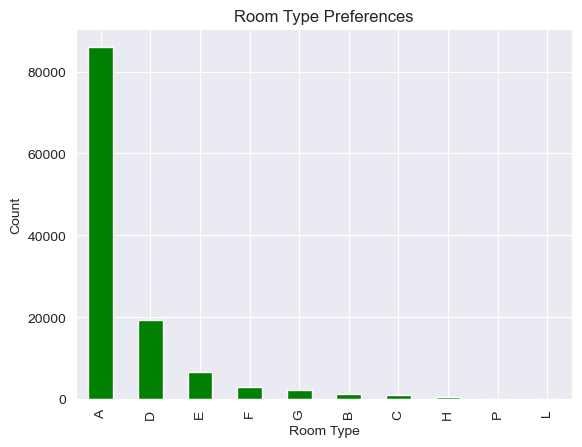

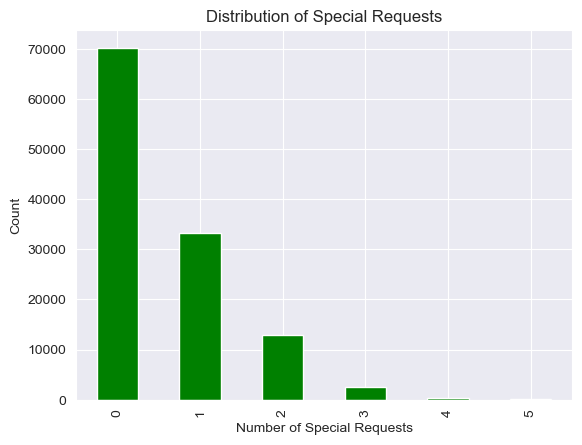

In [10]:
# 3. Room Preference and Special Requests

room_preferences = hotel_booking_df['reserved_room_type'].value_counts()
special_requests = hotel_booking_df['total_of_special_requests'].value_counts()
print(room_preferences)
print(special_requests)

# Room Preferences and Special Requests Visualization
room_preferences.plot(kind='bar', color='green')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

special_requests.plot(kind='bar', color='green')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')

plt.show()


a specific room type, which emerges as the most commonly booked A


-------------------------
2.Booking Patterns:
-------------------------


What are the peak and off-peak seasons? By examining booking dates, you can identify trends and seasonality in hotel bookings.
How far in advance do guests book their stays? The lead_time can provide insights into booking behavior, which can be crucial for pricing and promotion strategies.

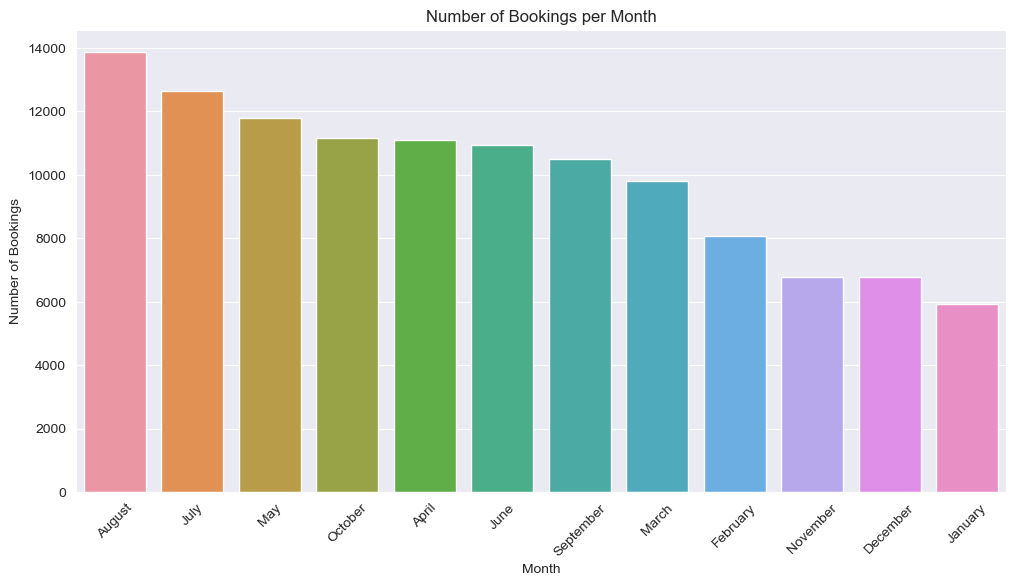

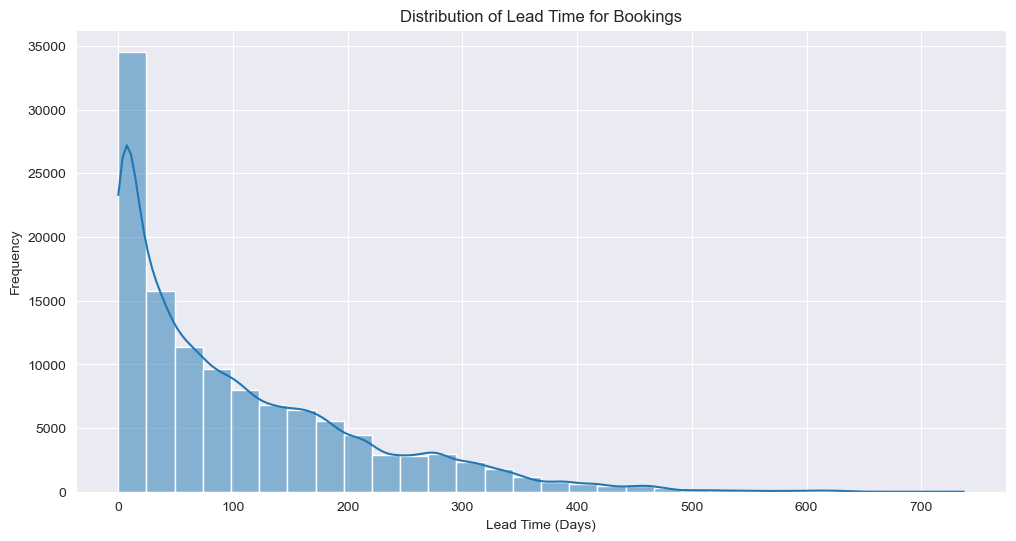

In [11]:

# Counting bookings per month
bookings_per_month = hotel_booking_df['arrival_date_month'].value_counts()

# Plotting bookings per month
plt.figure(figsize=(12, 6))
sns.barplot(x=bookings_per_month.index, y=bookings_per_month.values)
plt.xticks(rotation=45)
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# Analyzing lead time
plt.figure(figsize=(12, 6))
sns.histplot(hotel_booking_df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


Peak booking periods are evident in the months of August, July, and May, with the highest number occurring in August. This suggests a high demand for accommodations during these summer months,
histogram indicates that a significant number of bookings are made with a relatively short lead time, peaking at 0-10 days.

-------------------------
3. Cancellation Analysis:
--------------------------

What is the overall cancellation rate? This is critical for forecasting revenue and occupancy.
Are there specific factors that correlate with higher cancellation rates? For example, does a longer lead time, certain customer types, or lack of special requests correlate with more cancellations? This can inform cancellation policy adjustments.

In [12]:
# Calculate cancellation rate
total_bookings = len(hotel_booking_df)
total_cancellations = hotel_booking_df['is_canceled'].sum()
cancellation_rate = (total_cancellations / total_bookings) * 100

print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 37.04%


The overall cancellation rate in the dataset is approximately 37.04%.

In [13]:

# Basic Customer Segmentation Analysis

# Segmentation by Country
country_segmentation = hotel_booking_df.groupby('country').agg(
    Number_of_Bookings=pd.NamedAgg(column='country', aggfunc='count'),
    Average_Stay_Days=pd.NamedAgg(column='stays_in_week_nights', aggfunc='mean'),
    Cancellation_Rate=pd.NamedAgg(column='is_canceled', aggfunc='mean')
).sort_values(by='Number_of_Bookings', ascending=False)

# Segmentation by Customer Type
customer_type_segmentation = hotel_booking_df.groupby('customer_type').agg(
    Number_of_Bookings=pd.NamedAgg(column='customer_type', aggfunc='count'),
    Average_Stay_Days=pd.NamedAgg(column='stays_in_week_nights', aggfunc='mean'),
    Cancellation_Rate=pd.NamedAgg(column='is_canceled', aggfunc='mean')
)

# Output the top 5 countries
print("Segmentation by Country (Top 5):")
print(country_segmentation.head())

# Output the segmentation by customer type
print("\nSegmentation by Customer Type:")
print(customer_type_segmentation)

# Lead Time Analysis
lead_time_cancellation_rate = hotel_booking_df.groupby('lead_time')['is_canceled'].mean()

# Cancellation Rate by Number of Special Requests
cancellation_by_special_requests = hotel_booking_df.groupby('total_of_special_requests')['is_canceled'].mean()




print("\nCancellation Rate by Number of Special Requests:")
print(cancellation_by_special_requests)

Segmentation by Country (Top 5):
         Number_of_Bookings  Average_Stay_Days  Cancellation_Rate
country                                                          
PRT                   48590           2.176291           0.566351
GBR                   12129           3.445874           0.202243
FRA                   10415           2.536438           0.185694
ESP                    8568           2.246965           0.254085
DEU                    7287           2.559764           0.167147

Segmentation by Customer Type:
                 Number_of_Bookings  Average_Stay_Days  Cancellation_Rate
customer_type                                                            
Contract                       4076           3.851079           0.309617
Group                           577           2.057192           0.102253
Transient                     89613           2.508330           0.407463
Transient-Party               25124           2.262697           0.254299

Cancellation Rate by Number 

a. Transient customers means the customer who are temorarily travelling have the highest cancellation rate almost ~ 41 %

b. The more special requests a booking has, the lower the cancellation rate. Bookings with no special requests have a cancellation rate of about 47.72%, while those with 5 special requests have a rate of just 5.00%.

c. Also the number of bookings and cancellation rates are highly correlated. The higher number bookings tends to have higher number of cancelation rate and viseversa.

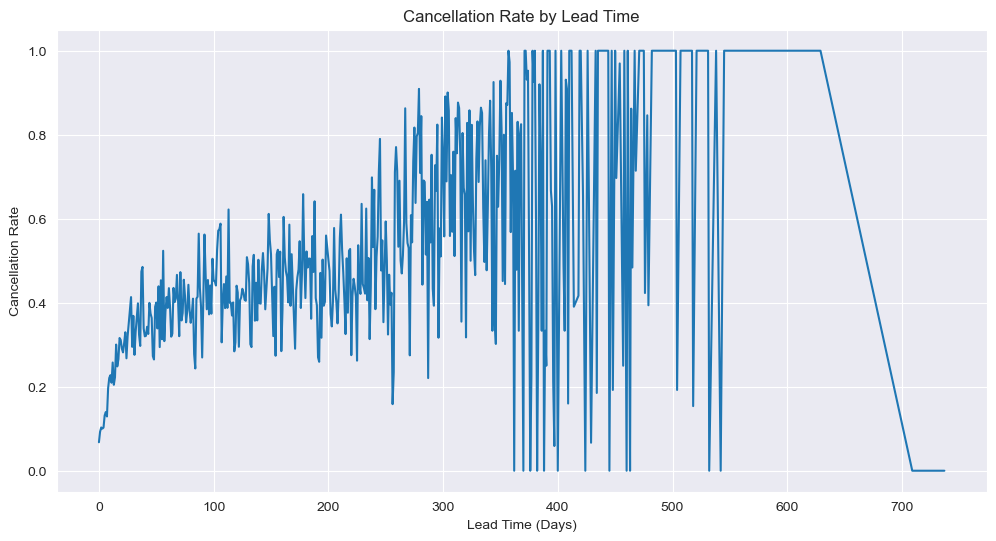

In [14]:
# Plotting the Lead Time Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x=lead_time_cancellation_rate.index, y=lead_time_cancellation_rate.values)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
plt.grid(True) 
plt.show()

The plot shows the relationship between lead time and cancellation rate. A general trend can be observed where longer lead times are associated with higher cancellation rates.
These insights can be very useful for understanding the behavior of different customer segments and how various factors influence cancellation rates. we can use this information for targeted strategies to reduce cancellations or for improving booking policies.

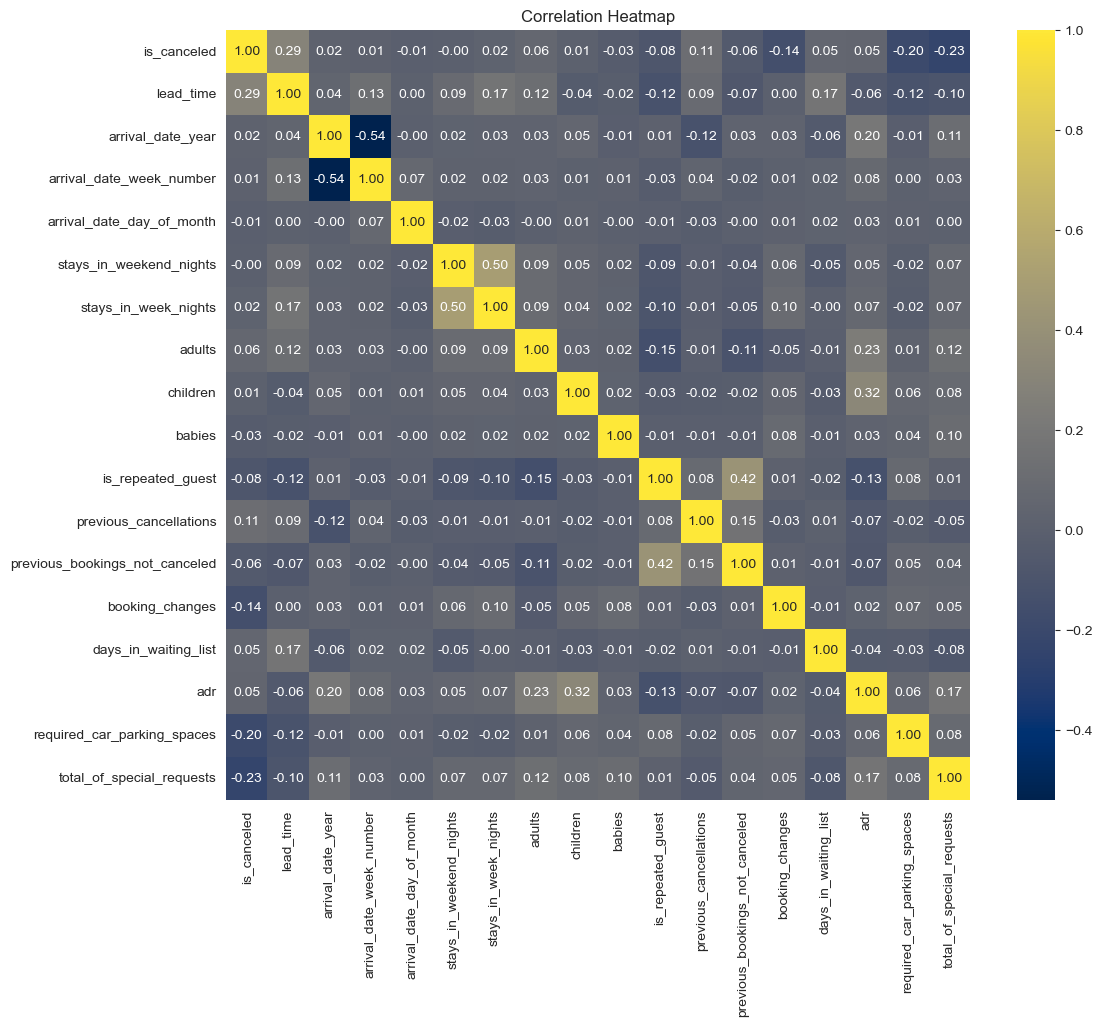

In [15]:
# Correlation Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(hotel_booking_df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap='cividis')
#Plasma: A colormap with vibrant colors that smoothly transitions through a variety of shades.
#Inferno: Similar to Plasma but with a different color distribution, often used for visualizations of data with a darker background.
#Magma: A colormap that emphasizes high-intensity colors, often used for emphasizing areas of high value in data.
#Cividis: Designed to be perceptually uniform and suitable for users with color vision deficiencies.
#Turbo: A colormap with vibrant and distinct colors, often used for highlighting different data values.

plt.title('Correlation Heatmap')
plt.show()


The heatmap is a visualization tool used to understand the relationships between multiple variables at once, in this case, within a hotel booking dataset. Here's an overall interpretation of the heatmap:

Strong Positive Correlations: Certain variables, like lead_time and previous_cancellations, show a strong positive correlation with the is_canceled variable. This indicates that bookings made far in advance or by customers who have previously canceled are more likely to be canceled again. 


Lead time and arrival date_year have a strong positive correlation with is_canceled. This means that bookings made closer to the arrival date and during certain times of the year (e.g., holidays) are more likely to be canceled.
Stays_in_weekend_nights has a weak negative correlation with is_canceled. This means that bookings that include weekend nights are slightly less likely to be canceled.
Adults have a weak positive correlation with is_canceled. This means that bookings with more adults are slightly more likely to be canceled.
Is_repeated_guest has a weak negative correlation with is_canceled. This means that repeat guests are slightly less likely to cancel their bookings.
Previous_cancellations has a weak positive correlation with is_canceled. This means that guests who have canceled bookings in the past are slightly more likely to cancel their bookings in the future.
Adr (average daily rate) has a weak positive correlation with is_canceled. This means that more expensive bookings are slightly more likely to be canceled.


---------------------------
4. Revenue Management:
---------------------------

What are the average daily rates (ADR) across different times of the year or customer segments? This could inform dynamic pricing strategies.
Which segments yield the highest revenue? Understanding which customer segments or room types bring in more revenue can help in resource allocation and marketing.

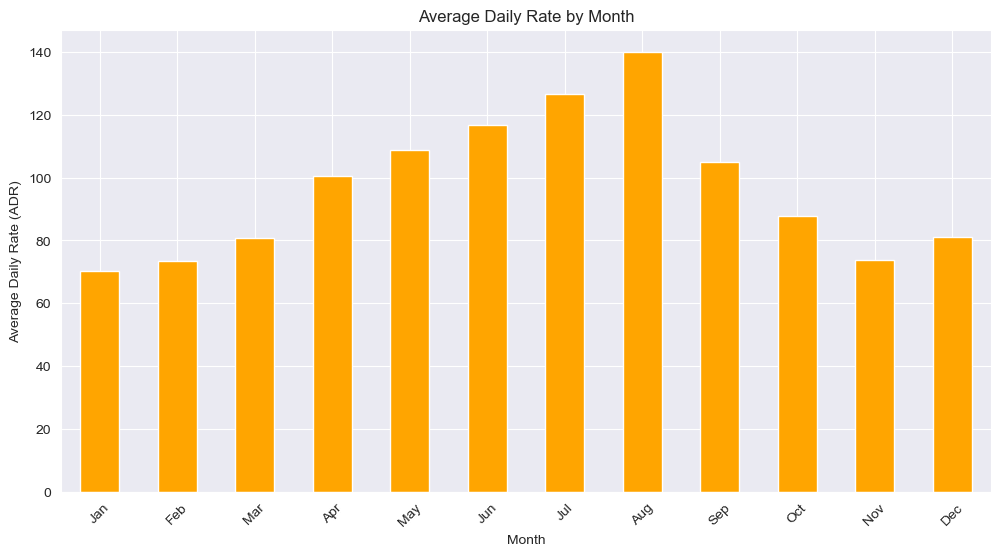

In [16]:
\
# Load the dataset into a DataFrame 
hotel_booking_df = pd.read_csv('D:\PYTHON_TEST\hotel_booking.csv')

# Map the month names to numbers if 'arrival_date_month' is not already in numeric form
months_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_booking_df['arrival_date_month'] = hotel_booking_df['arrival_date_month'].map(months_mapping)

# Calculate the average ADR for each month
adr_by_month = hotel_booking_df.groupby('arrival_date_month')['adr'].mean().sort_index()

# Plot the ADR by month
plt.figure(figsize=(12, 6))
adr_by_month.plot(kind='bar', color='orange')
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=range(len(adr_by_month)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


hotel bookings reveals a seasonal pricing pattern, with peaks typically during the summer months of June, July, and August, suggesting higher demand possibly due to vacationers and favorable weather. 

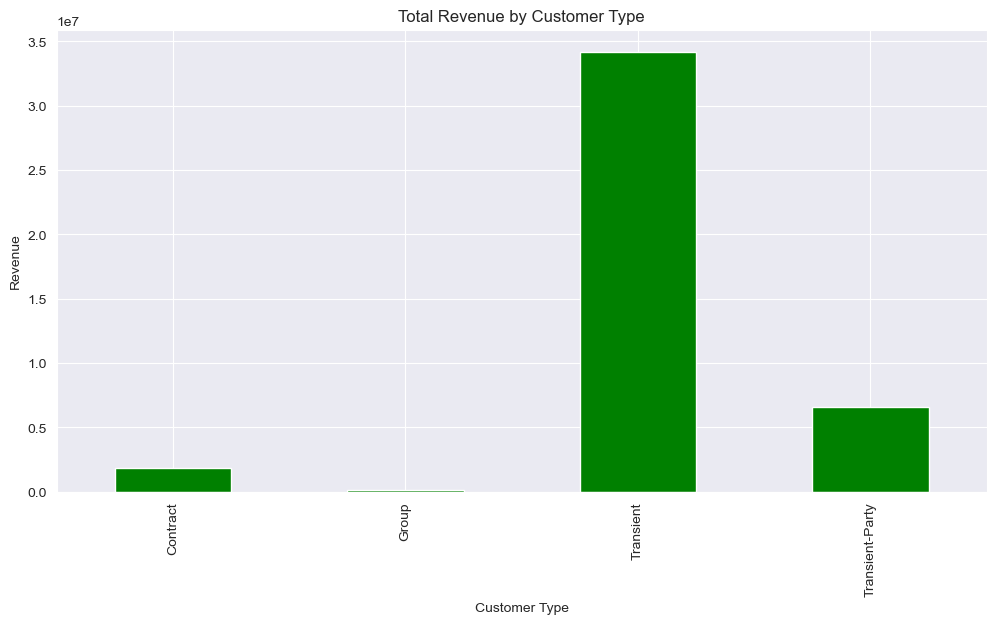

In [22]:
# revenue by customer segment
# Calculate the total nights stayed
hotel_booking_df['total_nights'] = hotel_booking_df['stays_in_weekend_nights'] + hotel_booking_df['stays_in_week_nights']

# Calculate the revenue by booking
hotel_booking_df['revenue'] = hotel_booking_df['adr'] * hotel_booking_df['total_nights']

# Aggregate the total revenue by customer type
revenue_by_customer_type = hotel_booking_df.groupby('customer_type')['revenue'].sum()

# Plot the revenue by customer type
plt.figure(figsize=(12, 6))
revenue_by_customer_type.plot(kind='bar', color='green')
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.show()


----------------------------
5. Logistic Regression Model
-----------------------------

LogisticRegression To perform predictive analytics using machine learning algorithms to predict booking cancellations this can help us in future

In [32]:
# LogisticRegression To perform predictive analytics using machine learning algorithms to predict booking cancellations

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


hotel_booking_df = pd.read_csv('D:\PYTHON_TEST\hotel_booking.csv')

# Selecting relevant features (example features, adjust as needed)
features = ['lead_time', 'total_of_special_requests', 'country', 'deposit_type', 'customer_type',
            'previous_cancellations', 'required_car_parking_spaces', 'adr', 'adults']
target = 'is_canceled'

# Preprocessing
X = hotel_booking_df[features]
y = hotel_booking_df[target]



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
)

# Create a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='liblinear', random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18720
           1       0.81      0.57      0.67     11128

    accuracy                           0.79     29848
   macro avg       0.80      0.75      0.76     29848
weighted avg       0.79      0.79      0.78     29848

Confusion Matrix:
 [[17235  1485]
 [ 4753  6375]]
ROC AUC Score: 0.852507198673401


the logistic regression model is quite good at predicting whether a booking will be canceled or not, with particularly strong performance in identifying the non-canceled bookings. However, it is less effective in correctly identifying the canceled bookings, as evidenced by the lower recall for class 1. The ROC AUC score suggests that the model has a good measure of separability and is capable of distinguishing between canceled and non-canceled bookings effectively.


              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18720
           1       0.81      0.57      0.67     11128

    accuracy                           0.79     29848
   macro avg       0.80      0.75      0.76     29848
weighted avg       0.79      0.79      0.78     29848



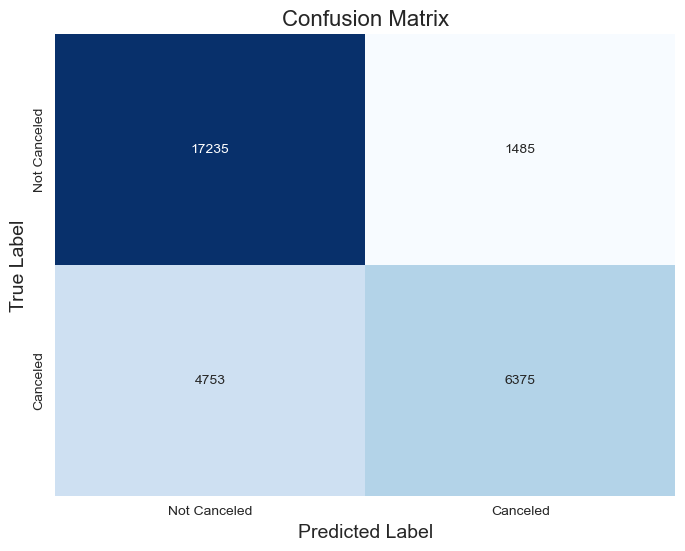

ROC AUC Score: 0.852507198673401


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
hotel_booking_df = pd.read_csv('D:\PYTHON_TEST\hotel_booking.csv')

# Selecting relevant features (example features, adjust as needed)
features = ['lead_time', 'total_of_special_requests', 'country', 'deposit_type', 'customer_type',
            'previous_cancellations', 'required_car_parking_spaces', 'adr', 'adults']
target = 'is_canceled'

# Preprocessing
X = hotel_booking_df[features]
y = hotel_booking_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
)

# Create a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='liblinear', random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels and title
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Canceled', 'Canceled'])
plt.yticks([0.5, 1.5], ['Not Canceled', 'Canceled'])

# Show plot
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18720
           1       0.81      0.57      0.67     11128

    accuracy                           0.79     29848
   macro avg       0.80      0.75      0.76     29848
weighted avg       0.79      0.79      0.78     29848



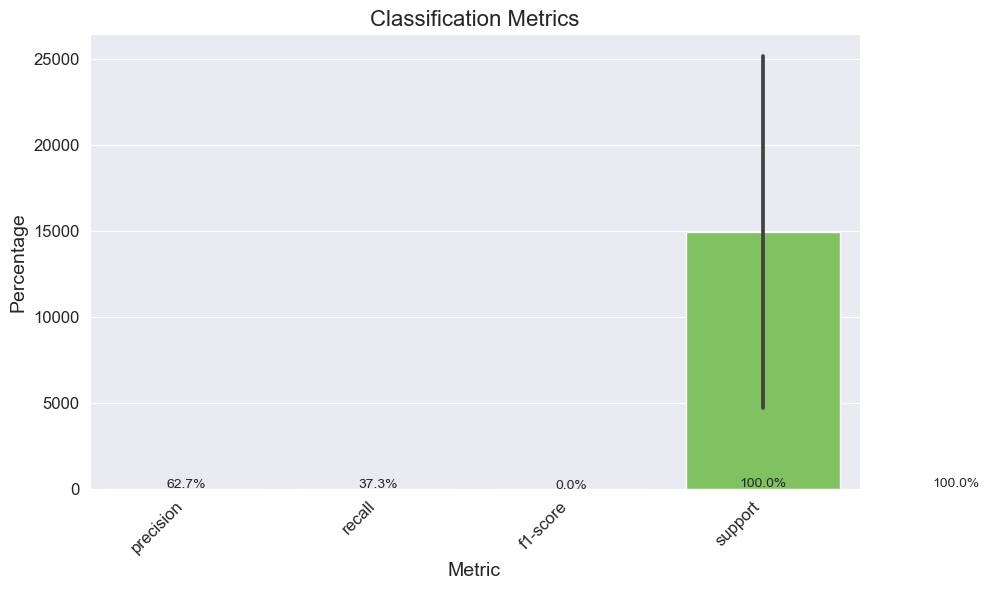

ROC AUC Score: 0.852507198673401


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the dataset
hotel_booking_df = pd.read_csv('D:\PYTHON_TEST\hotel_booking.csv')

# Selecting relevant features (example features, adjust as needed)
features = ['lead_time', 'total_of_special_requests', 'country', 'deposit_type', 'customer_type',
            'previous_cancellations', 'required_car_parking_spaces', 'adr', 'adults']
target = 'is_canceled'

# Preprocessing
X = hotel_booking_df[features]
y = hotel_booking_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
)

# Create a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='liblinear', random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Extract metrics for visualization
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Plot metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.iloc[:-1], palette='viridis')

# Add labels and title
plt.title('Classification Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Convert support to percentage
support_percentage = (metrics_df['support'] / len(y_test)) * 100
for i, p in enumerate(support_percentage):
    plt.text(i, p + 1, f'{p:.1f}%', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
